In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization
import keras
import dlib
import cv2
from sklearn import preprocessing
from imutils import face_utils
import numpy as np
from keras.optimizers import SGD,Adam
from keras.layers import UpSampling2D
from tensorflow.keras import Model

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy.random import seed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
X_train = np.load('/content/drive/MyDrive/DATASETS/X_train_KDEF_224.npy')
y_train = np.load('/content/drive/MyDrive/DATASETS/y_train_KDEF_224.npy')
X_test = np.load('/content/drive/MyDrive/DATASETS/X_test_KDEF_224.npy')
y_test = np.load('/content/drive/MyDrive/DATASETS/y_test_KDEF_224.npy')

5


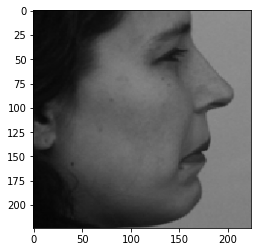

In [ ]:
import matplotlib.pyplot as plt
print(y_train[200])
##print(le.inverse_transform(y_train_KDEF[200]))
plt.imshow(X_train[200])
plt.show()

In [ ]:
x_train_data = X_train
print(x_train_data.shape)
y_train_data = to_categorical(y_train, 7)
print(y_train_data.shape)
x_test_data = X_test
print(x_test_data.shape)
y_test_data = to_categorical(y_test, 7)
print(y_test_data.shape)

(1213, 224, 224, 3)
(1213, 7)
(1210, 224, 224, 3)
(1210, 7)


In [ ]:
from sklearn.model_selection import train_test_split
x_train_final, x_valid_final, y_train_final, y_valid_final = train_test_split(x_train_data, y_train_data, test_size=0.1, random_state=100,shuffle=True)

In [ ]:
y_train_count=[]
for i in y_train_final:
  y_train_count.append(np.argmax(i))

import collections
collections.Counter(y_train_count)


Counter({0: 158, 1: 152, 2: 147, 3: 159, 4: 155, 5: 162, 6: 158})

In [ ]:
y_valid_count=[]
for i in y_valid_final:
  y_valid_count.append(np.argmax(i))

import collections
collections.Counter(y_valid_count)

Counter({0: 16, 1: 20, 2: 24, 3: 16, 4: 19, 5: 13, 6: 14})

In [ ]:


pre_trained_resnet50=ResNet50(input_shape=(224,224,3),
                                  include_top=False
                                  )
eff_net = tf.keras.applications.EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


258080768/258076736 [==============================] - 3s 0us/step


In [ ]:
x = eff_net.output
x = GlobalAveragePooling2D()(x)
predictions = layers.Dense(7, activation='softmax')(x)
model = Model(inputs=eff_net.input, outputs=predictions)
# fix the feature extraction part of the model
for layer in eff_net.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
from keras import optimizers

model.compile( keras.optimizers.RMSprop(lr=0.0001, decay=0.0001/20),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
nb_epoch = 50
learning_rate = 0.0001
batch_size = 6
weights="/content/drive/My Drive/EfficientNet/effnetwithBN.h5"
callbacks = [ModelCheckpoint(weights, monitor='val_loss', save_best_only=True, verbose=0)]

In [ ]:
%%time
# Train model
history = model.fit(x_train_final , y_train_final, batch_size=batch_size,epochs=nb_epoch,validation_data=(x_valid_final, y_valid_final),verbose=1, callbacks=callbacks, use_multiprocessing=True)

Epoch 1/50
182/182 [==============================] - 63s 106ms/step - loss: 1.9622 - accuracy: 0.1366 - val_loss: 1.9589 - val_accuracy: 0.1148


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
182/182 [==============================] - 14s 75ms/step - loss: 1.9607 - accuracy: 0.1402 - val_loss: 1.9574 - val_accuracy: 0.1311
Epoch 3/50
182/182 [==============================] - 14s 75ms/step - loss: 1.9620 - accuracy: 0.1320 - val_loss: 1.9524 - val_accuracy: 0.1148
Epoch 4/50
182/182 [==============================] - 14s 75ms/step - loss: 1.9567 - accuracy: 0.1467 - val_loss: 1.9654 - val_accuracy: 0.1066
Epoch 5/50
182/182 [==============================] - 13s 74ms/step - loss: 1.9560 - accuracy: 0.1549 - val_loss: 1.9716 - val_accuracy: 0.1066
Epoch 6/50
182/182 [==============================] - 13s 74ms/step - loss: 1.9614 - accuracy: 0.1228 - val_loss: 1.9569 - val_accuracy: 0.1311
Epoch 7/50
182/182 [==============================] - 13s 74ms/step - loss: 1.9608 - accuracy: 0.1320 - val_loss: 1.9572 - val_accuracy: 0.1066
Epoch 8/50
182/182 [==============================] - 14s 74ms/step - loss: 1.9606 - accuracy: 0.1292 - val_loss: 1.9475 - val_accuracy:

In [ ]:
for layer in pre_trained_resnet50.layers:
    layer.trainable=False

In [ ]:
#pre_trained_resnet50.summary()

In [ ]:

last_layer = pre_trained_resnet50.get_layer('conv5_block3_3_bn')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 7, 7, 2048)
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block3_3_bn/FusedBatchNormV3:0', description="created by layer 'conv5_block3_3_bn'")


In [ ]:
x = layers.Flatten()(last_output)      
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(7, activation='softmax')(x)           



In [ ]:
model = Model(pre_trained_resnet50.input, x) 

model.compile(loss='categorical_crossentropy',optimizer =tf.keras.optimizers.RMSprop(
    learning_rate=0.001), metrics=['accuracy'])


#model.fit(x_train_data,y_train_data,batch_size = 64,epochs=100)
history = model.fit(x_train_final , y_train_final, batch_size=64,epochs=50,validation_data=(x_valid_final, y_valid_final),verbose=1, use_multiprocessing=True)

Epoch 1/50
18/18 [==============================] - 50s 637ms/step - loss: 23.2123 - accuracy: 0.1375 - val_loss: 2.0844 - val_accuracy: 0.1885
Epoch 2/50
18/18 [==============================] - 11s 586ms/step - loss: 4.6787 - accuracy: 0.1265 - val_loss: 1.9450 - val_accuracy: 0.1311
Epoch 3/50
18/18 [==============================] - 11s 592ms/step - loss: 11.2556 - accuracy: 0.1457 - val_loss: 1.9448 - val_accuracy: 0.1311
Epoch 4/50
18/18 [==============================] - 10s 580ms/step - loss: 1.9461 - accuracy: 0.1457 - val_loss: 1.9450 - val_accuracy: 0.1311
Epoch 5/50
18/18 [==============================] - 10s 577ms/step - loss: 1.9461 - accuracy: 0.1457 - val_loss: 1.9451 - val_accuracy: 0.1311
Epoch 6/50
18/18 [==============================] - 10s 578ms/step - loss: 1.9461 - accuracy: 0.1457 - val_loss: 1.9452 - val_accuracy: 0.1311
Epoch 7/50
18/18 [==============================] - 10s 573ms/step - loss: 1.9461 - accuracy: 0.1457 - val_loss: 1.9456 - val_accuracy: 0.13

KeyboardInterrupt: ignored

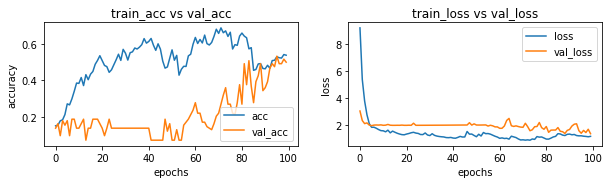

In [ ]:
import matplotlib.pyplot as plt             

def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label = "acc")
    plt.plot(history.history['val_accuracy'], label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(222)
    plt.plot(history.history['loss'] ,label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot_accuracy_loss(history)

In [ ]:
from sklearn.metrics import classification_report
from keras.models import Sequential, load_model

model=load_model('/content/drive/MyDrive/DATASETS/resnet224_0.53.h5')
model.summary()
predicted = model.predict(X_test)
pred_labels = np.argmax(predicted, axis = 1)
report = classification_report(y_test, pred_labels)
print(report)

OSError: ignored

In [ ]:
model.save('/content/drive/MyDrive/DATASETS/resnet224_0.53.h5')